In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
decisionTreeClassifier = tree.DecisionTreeClassifier()

In [100]:
df_housing  = pd.read_csv("housing.csv")
df_housing = df_housing.dropna()
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [101]:
df_housing[df_housing.columns[0]].count()

20433

In [102]:
yMax = df_housing["median_income"].max()
yMin = df_housing["median_income"].min()
yPrep =( yMax-yMin) / 3
medianClear = []
for y in df_housing["median_income"]:
    y = y - yMin
    y = y / yPrep
    y = round(y) 
    y = y + 1
    medianClear.append(y)

df_housing["median_income_fit"] = medianClear
y = df_housing["median_income_fit"]
y

0        3
1        3
2        2
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: median_income_fit, Length: 20433, dtype: int64

In [103]:
for i in range(df_housing[df_housing.columns[0]].count()):
    if y.iloc[i] == 1: df_housing.iloc[i, 7] = "low"
    elif y.iloc[i] == 2: df_housing.iloc[i, 7] = "medium"
    elif y.iloc[i] == 3: df_housing.iloc[i, 7] = "very high"
    elif y.iloc[i] == 4: df_housing.iloc[i, 7] = "high"
    i = i + 1
df_housing["median_income"] = df_housing["median_income"].astype("category")
df_housing["median_income_cat"] = df_housing["median_income"].cat.codes
df_housing.median_income_cat

0        3
1        3
2        2
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: median_income_cat, Length: 20433, dtype: int8

[Text(0.383855793142316, 0.9791666666666666, 'X[7] <= 125100.0\ngini = 0.497\nsamples = 16346\nvalue = [5583, 10139, 551, 73]'),
 Text(0.11450773677648494, 0.9375, 'X[7] <= 80650.0\ngini = 0.412\nsamples = 4486\nvalue = [3185, 1300, 1, 0]'),
 Text(0.023274542092794823, 0.8958333333333334, 'X[7] <= 67250.0\ngini = 0.195\nsamples = 1568\nvalue = [1396, 172, 0, 0]'),
 Text(0.010118738082856647, 0.8541666666666666, 'X[4] <= 68.0\ngini = 0.091\nsamples = 880\nvalue = [838, 42, 0, 0]'),
 Text(0.0033512451609175476, 0.8125, 'X[7] <= 61250.0\ngini = 0.389\nsamples = 34\nvalue = [25, 9, 0, 0]'),
 Text(0.0020800832033281333, 0.7708333333333334, 'X[7] <= 40000.0\ngini = 0.285\nsamples = 29\nvalue = [24, 5, 0, 0]'),
 Text(0.0009244814237013925, 0.7291666666666666, 'X[7] <= 30000.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2, 0, 0]'),
 Text(0.0004622407118506963, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.0013867221355520888, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]

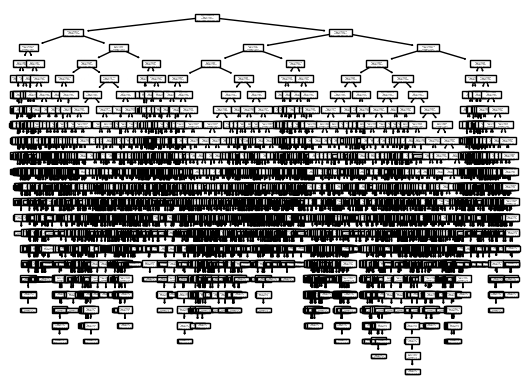

In [104]:
df_housing_tofit = df_housing
df_housing_tofit = df_housing_tofit.drop(columns="ocean_proximity")
df_housing_tofit = df_housing_tofit.drop(columns="median_income")
df_housing_tofit = df_housing_tofit.drop(columns="median_income_cat")
df_housing_tofit = df_housing_tofit.drop(columns="median_income_fit")
x_train, x_test, y_train, y_test = train_test_split(df_housing_tofit, y, test_size = 0.2, random_state=50)
decisionTreeClassifier = decisionTreeClassifier.fit(x_train, y_train)
tree.plot_tree(decisionTreeClassifier)

In [105]:
y_pred = decisionTreeClassifier.predict(x_test)
print(y_test)
print(y_pred)

17497    2
6787     1
15315    1
11213    1
579      2
        ..
19427    1
7863     2
12265    1
10465    2
16003    2
Name: median_income_fit, Length: 4087, dtype: int64
[2 2 1 ... 2 2 3]


In [106]:
#get model prediciton accuracy
acc_score = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {acc_score}")

Model accuracy score: 0.7651088818204062
